In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from utils import *

In [2]:
data_dir = "data/GuavaDiseaseDataset"
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'val')
test_dir = os.path.join(data_dir, 'test')
img_size = (224, 224)
batch_size = 16

In [3]:
shrink_dataset(train_dir, 60)
shrink_dataset(val_dir, 100)

Anthracnose Reduced to 60
fruit_fly Reduced to 60
healthy_guava Reduced to 60
Anthracnose Reduced to 100
fruit_fly Reduced to 100
healthy_guava Reduced to 100


In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=60,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.5)

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

valid_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
)

Found 180 images belonging to 3 classes.
Found 300 images belonging to 3 classes.
Found 382 images belonging to 3 classes.


In [6]:
class_indices = train_generator.class_indices
print(f"Class indices: {class_indices}")
class_indices = train_generator.class_indices
class_names = list(class_indices.keys())

Class indices: {'Anthracnose': 0, 'fruit_fly': 1, 'healthy_guava': 2}


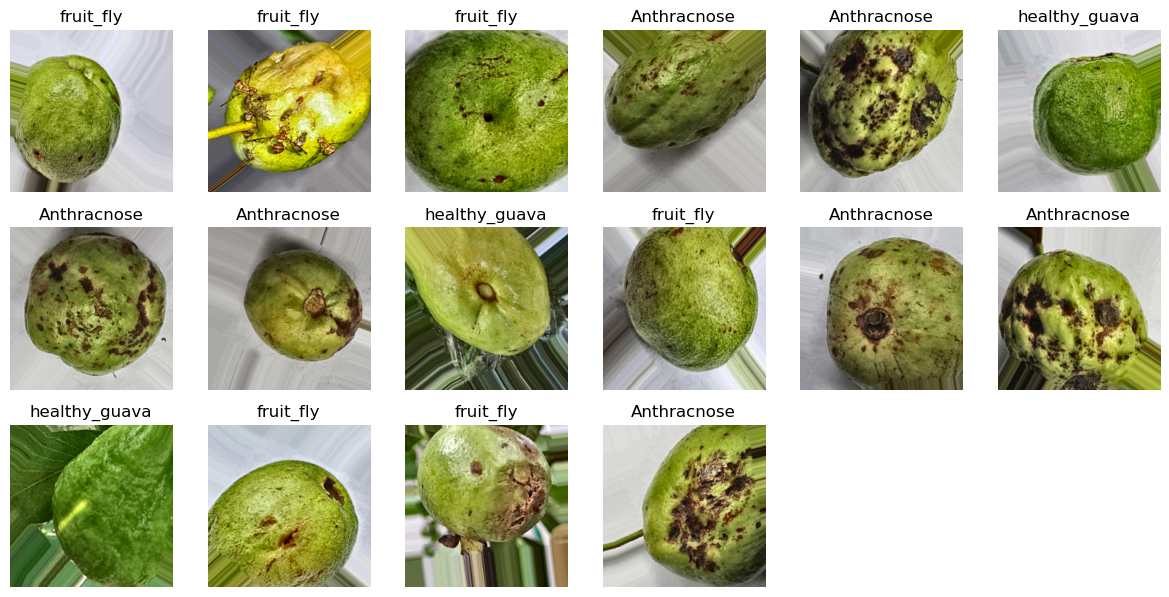

In [7]:
images, labels = next(train_generator)
show_images(images, labels, class_names)

In [8]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [9]:
imagenet_vgg19_layers = tf.keras.applications.VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
imagenet_vgg19_layers.trainable = False
imagenet_vgg19_model = tf.keras.Sequential([
    imagenet_vgg19_layers,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])
imagenet_vgg19_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
imagenet_vgg19_model.summary()
imagenet_vgg19_pre_history = imagenet_vgg19_model.fit(train_generator, epochs=10, validation_data=valid_generator, callbacks=[early_stopping])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 771       
                                                                 
Total params: 26,447,939
Trainable params: 6,423,555
Non-trainable params: 20,024,384
_________________________________________________________________
Epoch 1/10
12/12 [==================

In [10]:
imagenet_vgg19_model.evaluate(test_generator)

24/24 [==============================] - 38s 2s/step - loss: 1.0059 - accuracy: 0.9162


[1.0058634281158447, 0.9162303805351257]

In [11]:
imagenet_vgg19_layers.trainable = True
imagenet_vgg19_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
imagenet_vgg19_model.summary()
imagenet_vgg19_post_history = imagenet_vgg19_model.fit(train_generator, epochs=8, validation_data=valid_generator, callbacks=[early_stopping])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 771       
                                                                 
Total params: 26,447,939
Trainable params: 26,447,939
Non-trainable params: 0
_________________________________________________________________
Epoch 1/8
12/12 [===========================

In [13]:
imagenet_vgg19_model.evaluate(test_generator)

24/24 [==============================] - 35s 1s/step - loss: 0.7385 - accuracy: 0.9581


[0.7385115027427673, 0.9581151604652405]

In [14]:
### next model

In [15]:
vegetable_fruit_vgg19_layers = tf.keras.models.load_model("models/fruit_vegetable_classifier.h5", compile=False)

In [16]:
vegetable_fruit_vgg19_layers.trainable = False
vegetable_fruit_vgg19_model = tf.keras.Sequential([
    vegetable_fruit_vgg19_layers,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])
vegetable_fruit_vgg19_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
vegetable_fruit_vgg19_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 36)                2443108   
                                                                 
 flatten_1 (Flatten)         (None, 36)                0         
                                                                 
 dense_2 (Dense)             (None, 256)               9472      
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 3)                 771       
                                                                 
Total params: 2,453,351
Trainable params: 10,243
Non-trainable params: 2,443,108
_________________________________________________________________


In [17]:
vegetable_fruit_vgg19_pre_history = vegetable_fruit_vgg19_model.fit(train_generator, epochs=10,validation_data=valid_generator, callbacks=[early_stopping])

Epoch 1/10
12/12 [==============================] - 11s 664ms/step - loss: 1.6706 - accuracy: 0.3222 - val_loss: 1.5866 - val_accuracy: 0.3767
Epoch 2/10
12/12 [==============================] - 6s 559ms/step - loss: 1.5296 - accuracy: 0.4333 - val_loss: 1.4586 - val_accuracy: 0.5533
Epoch 3/10
12/12 [==============================] - 7s 566ms/step - loss: 1.4200 - accuracy: 0.4889 - val_loss: 1.3527 - val_accuracy: 0.6667
Epoch 4/10
12/12 [==============================] - 7s 562ms/step - loss: 1.3257 - accuracy: 0.5167 - val_loss: 1.2678 - val_accuracy: 0.6700
Epoch 5/10
12/12 [==============================] - 7s 561ms/step - loss: 1.2479 - accuracy: 0.5611 - val_loss: 1.1979 - val_accuracy: 0.6733
Epoch 6/10
12/12 [==============================] - 6s 558ms/step - loss: 1.1978 - accuracy: 0.5389 - val_loss: 1.1400 - val_accuracy: 0.6967
Epoch 7/10
12/12 [==============================] - 7s 564ms/step - loss: 1.1314 - accuracy: 0.6056 - val_loss: 1.0906 - val_accuracy: 0.7067
Epoch

In [18]:
vegetable_fruit_vgg19_model.evaluate(test_generator)

24/24 [==============================] - 3s 142ms/step - loss: 0.9884 - accuracy: 0.6675


[0.9883516430854797, 0.6675392389297485]

In [19]:
vegetable_fruit_vgg19_layers.trainable = True
vegetable_fruit_vgg19_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
vegetable_fruit_vgg19_post_history = vegetable_fruit_vgg19_model.fit(train_generator, epochs=15, validation_data=valid_generator, callbacks=[early_stopping])

Epoch 1/15
12/12 [==============================] - 16s 942ms/step - loss: 1.2035 - accuracy: 0.3389 - val_loss: 0.9835 - val_accuracy: 0.7133
Epoch 2/15
12/12 [==============================] - 11s 919ms/step - loss: 1.1769 - accuracy: 0.3722 - val_loss: 0.9685 - val_accuracy: 0.7233
Epoch 3/15
12/12 [==============================] - 13s 1s/step - loss: 1.1608 - accuracy: 0.4111 - val_loss: 0.9597 - val_accuracy: 0.7000
Epoch 4/15
12/12 [==============================] - 12s 1s/step - loss: 1.1542 - accuracy: 0.3778 - val_loss: 0.9563 - val_accuracy: 0.6867
Epoch 5/15
12/12 [==============================] - 13s 1s/step - loss: 1.0910 - accuracy: 0.5000 - val_loss: 0.9581 - val_accuracy: 0.6933
Epoch 6/15
12/12 [==============================] - 10s 865ms/step - loss: 1.0480 - accuracy: 0.6278 - val_loss: 0.9732 - val_accuracy: 0.6600
Epoch 7/15
12/12 [==============================] - 12s 976ms/step - loss: 1.0039 - accuracy: 0.6667 - val_loss: 0.9859 - val_accuracy: 0.6433


In [21]:
vegetable_fruit_vgg19_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 36)                2443108   
                                                                 
 flatten_1 (Flatten)         (None, 36)                0         
                                                                 
 dense_2 (Dense)             (None, 256)               9472      
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 3)                 771       
                                                                 
Total params: 2,453,351
Trainable params: 2,419,239
Non-trainable params: 34,112
_________________________________________________________________


In [22]:
vegetable_fruit_vgg19_model.evaluate(test_generator)

24/24 [==============================] - 3s 139ms/step - loss: 0.9374 - accuracy: 0.6702


[0.9374279379844666, 0.6701570749282837]

In [23]:
# NEXT MODEL

In [24]:
tumor_vgg19_layers = tf.keras.models.load_model("models/brain_tumor.h5", compile=False)

In [25]:
tumor_vgg19_layers.trainable = False
tumor_vgg19_model = tf.keras.Sequential([
    tumor_vgg19_layers,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])
tumor_vgg19_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
tumor_vgg19_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 4)                 33134660  
                                                                 
 flatten_2 (Flatten)         (None, 4)                 0         
                                                                 
 dense_4 (Dense)             (None, 256)               1280      
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 3)                 771       
                                                                 
Total params: 33,136,711
Trainable params: 2,051
Non-trainable params: 33,134,660
_________________________________________________________________


In [26]:
tumor_vgg19_pre_history = tumor_vgg19_model.fit(train_generator, epochs=10,validation_data=valid_generator, callbacks=[early_stopping])

Epoch 1/10
12/12 [==============================] - 46s 4s/step - loss: 1.1615 - accuracy: 0.3944 - val_loss: 1.1590 - val_accuracy: 0.3833
Epoch 2/10
12/12 [==============================] - 44s 4s/step - loss: 1.1579 - accuracy: 0.3556 - val_loss: 1.1500 - val_accuracy: 0.3767
Epoch 3/10
12/12 [==============================] - 44s 4s/step - loss: 1.1497 - accuracy: 0.3667 - val_loss: 1.1419 - val_accuracy: 0.3900
Epoch 4/10
12/12 [==============================] - 44s 4s/step - loss: 1.1408 - accuracy: 0.3667 - val_loss: 1.1341 - val_accuracy: 0.4233
Epoch 5/10
12/12 [==============================] - 43s 4s/step - loss: 1.1274 - accuracy: 0.4389 - val_loss: 1.1276 - val_accuracy: 0.4300
Epoch 6/10
12/12 [==============================] - 44s 4s/step - loss: 1.1319 - accuracy: 0.3889 - val_loss: 1.1225 - val_accuracy: 0.4500
Epoch 7/10
12/12 [==============================] - 46s 4s/step - loss: 1.1280 - accuracy: 0.3611 - val_loss: 1.1188 - val_accuracy: 0.4367
Epoch 8/10
12/12 [==

In [27]:
tumor_vgg19_model.evaluate(test_generator)

24/24 [==============================] - 36s 1s/step - loss: 1.1126 - accuracy: 0.4450


[1.112584114074707, 0.4450261890888214]

In [28]:
tumor_vgg19_layers.trainable = True
tumor_vgg19_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='categorical_crossentropy',metrics=['accuracy'])

In [29]:
tumor_vgg19_post_history = tumor_vgg19_model.fit(train_generator, epochs=15, validation_data=valid_generator, callbacks=[early_stopping])

Epoch 1/15
12/12 [==============================] - 97s 8s/step - loss: 1.0735 - accuracy: 0.5889 - val_loss: 1.0577 - val_accuracy: 0.6067
Epoch 2/15
12/12 [==============================] - 96s 8s/step - loss: 1.0179 - accuracy: 0.7278 - val_loss: 0.9943 - val_accuracy: 0.7733
Epoch 3/15
12/12 [==============================] - 96s 8s/step - loss: 0.9758 - accuracy: 0.8111 - val_loss: 0.9759 - val_accuracy: 0.7867
Epoch 4/15
12/12 [==============================] - 96s 9s/step - loss: 0.9491 - accuracy: 0.8389 - val_loss: 0.9622 - val_accuracy: 0.8200
Epoch 5/15
12/12 [==============================] - 96s 8s/step - loss: 0.9537 - accuracy: 0.8333 - val_loss: 0.9526 - val_accuracy: 0.8200
Epoch 6/15
12/12 [==============================] - 96s 8s/step - loss: 0.9399 - accuracy: 0.8333 - val_loss: 0.9859 - val_accuracy: 0.6967
Epoch 7/15
12/12 [==============================] - 95s 8s/step - loss: 0.9509 - accuracy: 0.8278 - val_loss: 0.9342 - val_accuracy: 0.8767
Epoch 8/15
12/12 [==

In [30]:
tumor_vgg19_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 4)                 33134660  
                                                                 
 flatten_2 (Flatten)         (None, 4)                 0         
                                                                 
 dense_4 (Dense)             (None, 256)               1280      
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 3)                 771       
                                                                 
Total params: 33,136,711
Trainable params: 33,136,711
Non-trainable params: 0
_________________________________________________________________


In [31]:
tumor_vgg19_model.evaluate(test_generator)

24/24 [==============================] - 33s 1s/step - loss: 0.9213 - accuracy: 0.9188


[0.921308159828186, 0.9188481569290161]

In [32]:
imagenet_history = concatenate_histories(imagenet_vgg19_pre_history, imagenet_vgg19_post_history)
vegetable_vgg19_history = concatenate_histories(vegetable_fruit_vgg19_pre_history, vegetable_fruit_vgg19_post_history)
tumor_vgg19_history = concatenate_histories(tumor_vgg19_pre_history, tumor_vgg19_post_history)

In [33]:
histories = {
    'Imagenet': imagenet_history,
    'Fruits and Vegetables VGG19': vegetable_vgg19_history,
    'Brain Tumor VGG19': tumor_vgg19_history}
for name, history in histories.items():
    print("name:", name, "history:", type(history))

name: Imagenet history: <class 'dict'>
name: Fruits and Vegetables VGG19 history: <class 'dict'>
name: Brain Tumor VGG19 history: <class 'dict'>


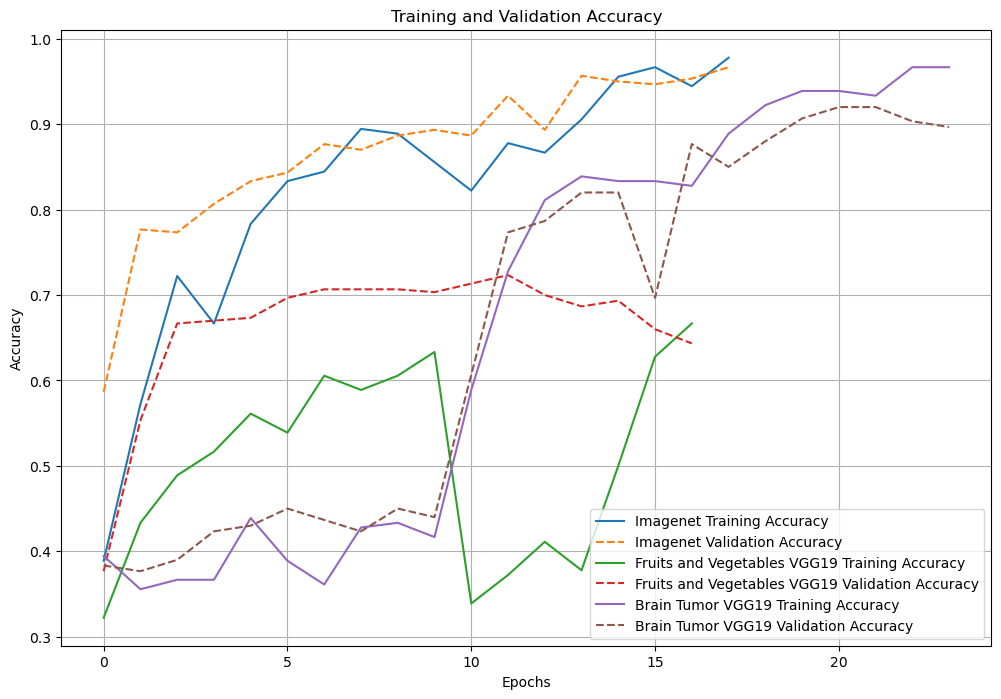

In [34]:
plot_accuracy(histories)

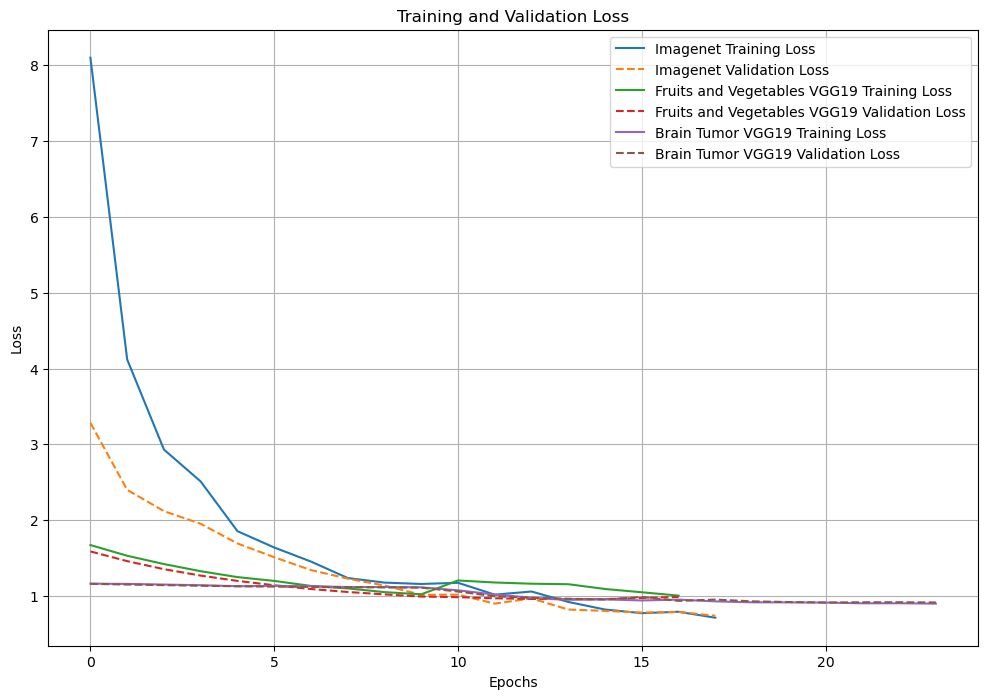

In [35]:
plot_loss(histories)

In [36]:
summarize_final_metrics(histories)

                         Model  Final Training Accuracy  \
0                     Imagenet                 0.977778   
1  Fruits and Vegetables VGG19                 0.666667   
2            Brain Tumor VGG19                 0.966667   

   Final Validation Accuracy  Final Training Loss  Final Validation Loss  
0                   0.966667             0.712045               0.738063  
1                   0.643333             1.003860               0.985906  
2                   0.896667             0.897897               0.913261  
